In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
vaccinations = pd.read_csv("owid-covid-data.csv")
vaccinations['date'] = pd.to_datetime(vaccinations['date'], format='%Y-%m-%d')

regions = pd.read_csv("all2.csv")

tweets = pd.read_csv("vaccination_all_tweets.csv")
sentiments = pd.read_csv("covid-19_vaccine_tweets_with_sentiment.csv")
all_tweet_data = pd.merge(sentiments, tweets, left_on = 'tweet_id', right_on = 'id')
all_tweet_data.rename(columns={'label': 'sentiment'}, inplace=True)

print(vaccinations.head(), regions.head(), all_tweet_data.head())

  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan 2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0              NaN                597.

In [3]:
vax_info = vaccinations[['iso_code', 'location', 'people_vaccinated_per_hundred', 'continent']]
region_info = regions[['name', 'alpha-2', 'alpha-3', 'country-code', 'region', 'region-code']]
tweet_info = all_tweet_data[['id', 'user_location', 'user_followers', 'sentiment']]


In [4]:
vax_n = region_info['name']
vax_a2 = region_info['alpha-2']
vax_a3 = region_info['alpha-3']
vax_r = region_info['region']
def fixlocation(loc):
    loc = str(loc).split(", ")
    hit = False
    for i in range(len(vax_n)):
        for l in loc:
            if l == str(vax_n[i]):
                return str(vax_n[i])
            elif l == str(vax_a2[i]):
                return str(vax_n[i])
            elif l == str(vax_a3[i]):
                return str(vax_n[i])
            elif l == str(vax_r[i]):
                return str(vax_n[i])
    return loc[-1]

def categorizeNum(val):
    if val == 1:
        return "negative"
    elif val == 2:
        return "neutral"
    elif val == 3:
        return "positive"
    else:
        return "unsure"

In [5]:
tweet_info = tweet_info.dropna(how='any',axis=0) 
tweet_info['location'] = [fixlocation(loc) for loc in tweet_info['user_location']]
tweet_info = pd.merge(tweet_info, region_info, left_on='location', right_on='name', how='inner')
print(tweet_info.head())

                    id        user_location  user_followers  sentiment  \
0  1362165556091191296       Wisconsin, USA            3744          3   
1  1384834947110903808  North Carolina, USA             534          2   
2  1359713613087469568      Des Moines, USA             269          3   
3  1355007738003255296       Minnesota, USA              30          2   
4  1353930694267817984          Oregon, USA              23          2   

                   location                      name alpha-2 alpha-3  \
0  United States of America  United States of America      US     USA   
1  United States of America  United States of America      US     USA   
2  United States of America  United States of America      US     USA   
3  United States of America  United States of America      US     USA   
4  United States of America  United States of America      US     USA   

   country-code    region  region-code  
0           840  Americas         19.0  
1           840  Americas         

In [6]:
vax_n = region_info['name']
vax_a2 = region_info['alpha-2']
vax_a3 = region_info['alpha-3']
def fixloc(loc):
    for i in range(len(vax_n)):
            if loc == str(vax_n[i]):
                return str(vax_n[i])
            elif loc == str(vax_a2[i]):
                return str(vax_n[i])
            elif loc == str(vax_a3[i]):
                return str(vax_n[i])
            elif loc == str(vax_r[i]):
                return str(vax_n[i])
    return loc[-1]


In [7]:
vaax_info = vax_info.groupby('location').aggregate({'iso_code': 'max', 'people_vaccinated_per_hundred': 'max'})
vaax_info['location'] = [fixloc(loc) for loc in vaax_info['iso_code']]
print(set(vaax_info.index.values))
print(vaax_info.head())

{'China', 'Libya', 'Namibia', 'Marshall Islands', 'Vietnam', 'Czechia', 'Dominican Republic', 'Sao Tome and Principe', 'Benin', 'Ukraine', 'United Kingdom', 'Mauritania', 'Mali', 'Iceland', 'Tonga', 'Antigua and Barbuda', 'Taiwan', 'Faeroe Islands', 'Ireland', 'Belgium', 'Uzbekistan', 'Uruguay', 'Anguilla', 'Ecuador', 'Kenya', 'Jersey', 'Cuba', 'Portugal', 'Malta', 'World', 'Germany', 'Yemen', 'Peru', 'Falkland Islands', 'Palestine', 'Guyana', 'Kyrgyzstan', 'Malaysia', 'Macao', 'Angola', 'Senegal', 'Hungary', 'Spain', 'Tajikistan', 'Andorra', 'Russia', 'Indonesia', 'Gambia', 'Africa', 'Georgia', 'Lesotho', 'Cayman Islands', 'United States', 'Iran', 'Guinea', 'Wallis and Futuna', 'Burkina Faso', 'Venezuela', 'Micronesia (country)', 'Panama', 'Comoros', 'Maldives', 'Qatar', 'Ghana', 'Nauru', 'Samoa', 'Tuvalu', 'Philippines', 'India', 'Mongolia', 'Ethiopia', 'Malawi', 'South Korea', 'International', 'New Caledonia', 'Bangladesh', 'Papua New Guinea', 'Curacao', 'Guinea-Bissau', 'Algeria', 

In [8]:
import matplotlib.pyplot as plt
tweet_vax =pd.merge(tweet_info, vaax_info, left_on='alpha-3', right_on='iso_code', how="inner")
print(tweet_vax.head())
countries = tweet_vax.groupby('name').agg(tweet_count =('sentiment', 'count'), 
                                               region=('region', 'max'))
#print(countries[:len(countries)//2], countries[len(countries)//2:])
#display(countries[:len(countries)//2])
#display(countries[len(countries)//2:])
#regions = tweet_vax.groupby('region').agg(tweet_count =('sentiment', 'count'), 
                                               #region=('region', 'max'))
#print(regions)
#display(regions)
tweet_vax = tweet_vax.dropna(how='any',axis=0)


                    id        user_location  user_followers  sentiment  \
0  1362165556091191296       Wisconsin, USA            3744          3   
1  1384834947110903808  North Carolina, USA             534          2   
2  1359713613087469568      Des Moines, USA             269          3   
3  1355007738003255296       Minnesota, USA              30          2   
4  1353930694267817984          Oregon, USA              23          2   

                 location_x                      name alpha-2 alpha-3  \
0  United States of America  United States of America      US     USA   
1  United States of America  United States of America      US     USA   
2  United States of America  United States of America      US     USA   
3  United States of America  United States of America      US     USA   
4  United States of America  United States of America      US     USA   

   country-code    region  region-code iso_code  \
0           840  Americas         19.0      USA   
1           84

In [9]:
res_neu = tweet_vax[tweet_vax['sentiment'] == 2] 
res_pos = tweet_vax[tweet_vax['sentiment'] == 3] 
res_neg = tweet_vax[tweet_vax['sentiment'] == 1] 
rslt_df = pd.concat([res_neu.sample(n=100), pd.concat([res_pos, res_neg])])
rslt_df['sentiments'] = [categorizeNum(val) for val in rslt_df['sentiment']]
print(len(res_neu), len(res_pos), len(res_neg))

202 88 19


Model Score: 0.5700483091787439


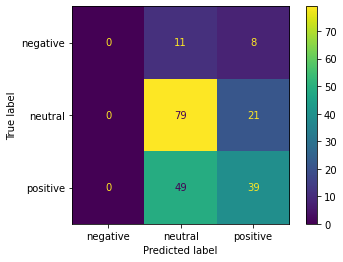

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 
target = rslt_df['sentiments']

data = rslt_df[['people_vaccinated_per_hundred', 'user_followers', 'region-code']]

logistic_model = LogisticRegression()
logistic_model.fit(X=data, y=target)

rslt_df['predicted_outcome'] = logistic_model.predict(data)

q4_score = logistic_model.score(data, target)

plot_confusion_matrix(logistic_model, data, target)

print("Model Score:", q4_score)

plt.grid(False)

Model Score: 0.5700483091787439


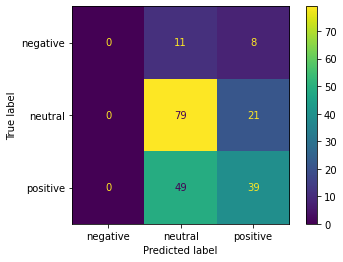

In [13]:

target = rslt_df['sentiments']

data = rslt_df[['people_vaccinated_per_hundred', 'user_followers', 'region-code']]

logistic_model = LogisticRegression()
logistic_model.fit(X=data, y=target)

rslt_df['predicted_outcome'] = logistic_model.predict(data)

q4_score = logistic_model.score(data, target)

plot_confusion_matrix(logistic_model, data, target)

print("Model Score:", q4_score)

plt.grid(False)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

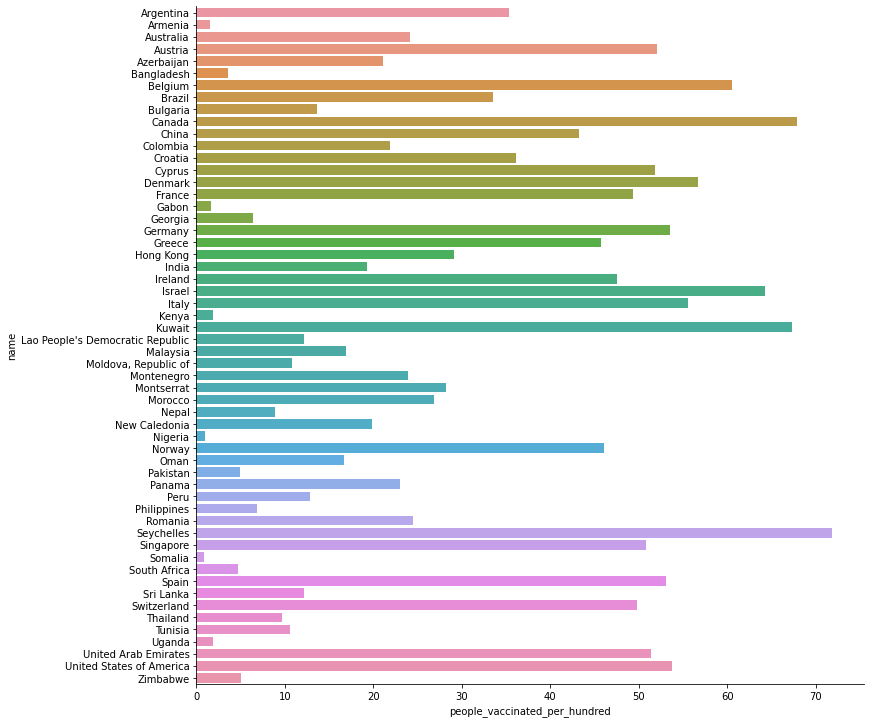

In [14]:
tvax = tweet_vax[['id', 'name', 'people_vaccinated_per_hundred', 'sentiment', 'region']]
vaxandtweet = tvax.groupby('name').aggregate({'sentiment': 'mean', 'people_vaccinated_per_hundred': 'max'})
vax1 = vaxandtweet[:len(vaxandtweet)//2]
vax2 = vaxandtweet[len(vaxandtweet)//2:]
#sns.catplot(data=vaxandtweet, x=vaxandtweet.index, y='people_vaccinated_per_hundred', kind='bar', aspect=10)
v = sns.catplot(data=vaxandtweet, y=vaxandtweet.index, x='people_vaccinated_per_hundred', kind='bar', aspect=1, height = 10, orient = "h")
v.set(xlabel='People Vaccinated per Hundred People', ylabel='Country')
#sns.catplot(data=vax2, x=vax2.index, y='people_vaccinated_per_hundred', kind='bar', aspect=10)
#sns.catplot(data=vaxandtweet, x=vaxandtweet.index, y='sentiment', kind='bar', aspect=10)
s = sns.catplot(data=vaxandtweet, y=vaxandtweet.index, x='sentiment', kind='bar', aspect=1, height = 10, orient = "h")
s.set(xlabel='Average Tweet Sentiment', ylabel='Country')
#sns.catplot(data=vax2, x=vax2.index, y='sentiment', kind='bar', aspect=10)
s.savefig('vaxByCountry.png', dpi=300)
v.savefig('sentByCountry.png', dpi=300)

In [ ]:
serDf = tweet_vax.groupby('name').agg(avd_sentiment =('sentiment', 'mean'), region=('region', 'max'),
                                               region=('region', 'max'))
p1 = sns.scatterplot(x=serDf['sentiment'], y = serDf['people_vaccinated_per_hundred'], hue=serDf['region'])
p2 = sns.lineplot(data=serDf, x=serDf['sentiment'], y = serDf['people_vaccinated_per_hundred'], color='g')

In [ ]:
graph2 = sns.lineplot(data=tweet_vax, x="sentiment", y="people_vaccinated_per_hundred")
# plt.savefig('graph_general_sentiments_countries', dpi=300)

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# #pull categorical variables for one-hot encoding
# cData = dataGrades[['grades', 'would_take_agains']].values

#target data we want to predict
target = tweet_vax['people_vaccinated_per_hundred'].values
#one-hot encode categorical variables and combine with numeric to make training data
## modelData = np.append(OneHotEncoder().fit_transform(cData).toarray(),
#                       dataGrades[['student_difficult', 'star_rating', 'diff_index']], axis=1)
#define and fit linear model
linear_model = LinearRegression()
categorical = OneHotEncoder().fit_transform(tweet_vax['sentiment'].to_frame()).toarray()
linear_model.fit(X=categorical, y=target)

#predict student ratings
tweet_vax['predicted_people_vaccinated_per_hundred'] = linear_model.predict(categorical)

#return mean squared error & r-squared values of model
q2_mse = mean_squared_error(tweet_vax['people_vaccinated_per_hundred'].values, tweet_vax['predicted_people_vaccinated_per_hundred'].values)
q2_r2 = r2_score(tweet_vax['people_vaccinated_per_hundred'].values, tweet_vax['predicted_people_vaccinated_per_hundred'].values)
print("MSE:", q2_mse, "r^2:", q2_r2)

MSE: 429.98786860841426 r^2: 0.023635782176234965


In [16]:
correlation_matrix = np.corrcoef(tweet_vax['sentiment'].values, tweet_vax['people_vaccinated_per_hundred'].values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.029149887785165116


In [17]:
grouped = tweet_vax.groupby('iso_code').agg({'sentiment':'mean', 'people_vaccinated_per_hundred':'max'})
correlation_matrix = np.corrcoef(grouped['sentiment'].values, grouped['people_vaccinated_per_hundred'].values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.02206214335655314


In [ ]:
tweet_vax

In [18]:
grouped

,sentiment,people_vaccinated_per_hundred
iso_code,,
ARE,2.750000,51.38
ARG,3.000000,35.39
ARM,2.000000,1.57
AUS,1.400000,24.13
AUT,3.000000,52.10
AZE,2.500000,21.10
BEL,2.200000,60.51
BGD,2.000000,3.54
BGR,2.000000,13.60
